In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.ticker as mticker
import time
import csv
import zoneinfo
import matplotlib.pyplot as plt
import matplotlib.colors
import math

In [5]:
data_fn = '../data/amazon_reviews_hourly_cut.csv'
df = pd.read_csv(data_fn)
display(df)

,category,1577865600.0,1577869200.0,1577872800.0,1577876400.0,1577880000.0,1577883600.0,1577887200.0,1577890800.0,1577894400.0,...,1696024800.0,1696028400.0,1696032000.0,1696035600.0,1696039200.0,1696042800.0,1696046400.0,1696050000.0,1696053600.0,1696057200.0
0,All_Beauty,6,0,4,8,4,8,12,22,19,...,0,0,0,0,0,0,0,0,0,NaN
1,Amazon_Fashion,20,15,16,16,29,55,61,82,115,...,0,0,0,0,0,0,0,0,0,NaN
2,Appliances,9,6,9,18,26,56,63,66,61,...,0,0,0,0,0,0,0,0,0,NaN
3,Arts_Crafts_and_Sewing,68,51,38,59,113,204,233,306,340,...,0,0,0,0,0,0,0,0,0,NaN
4,Automotive,124,116,98,156,259,406,535,621,668,...,0,0,0,0,0,0,0,0,0,NaN
5,Baby_Products,45,21,21,30,74,97,142,186,176,...,0,0,0,0,0,0,0,0,0,NaN
6,Beauty_and_Personal_Care,139,115,123,124,198,326,518,575,678,...,0,0,0,0,0,0,0,0,0,NaN
7,Books,92,58,59,67,133,237,283,354,431,...,0,0,0,0,0,0,0,0,0,NaN
8,CDs_and_Vinyl,14,3,13,13,15,14,44,47,50,...,0,0,0,0,0,0,0,0,0,NaN
9,Cell_Phones_and_Accessories,154,124,106,161,271,447,530,666,698,...,0,0,0,0,0,0,0,0,0,NaN


In [6]:
timeseries = df.to_numpy()
# remove columns
timeseries = timeseries[:,1:]
# remove zero rows
timeseries = timeseries[~np.all(timeseries == 0, axis=1)]

time_interval = 60*60
time_arr = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m-%d-%Y') for timestamp in df.columns[1:]])
years = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%Y') for timestamp in df.columns[1:]])
months = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m') for timestamp in df.columns[1:]])
weekdays_timestamps = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).weekday() for timestamp in df.columns[1:]])
timeseries_len = timeseries.shape[1]

categories = df['category'].to_numpy()

print(timeseries.shape)

(34, 32832)


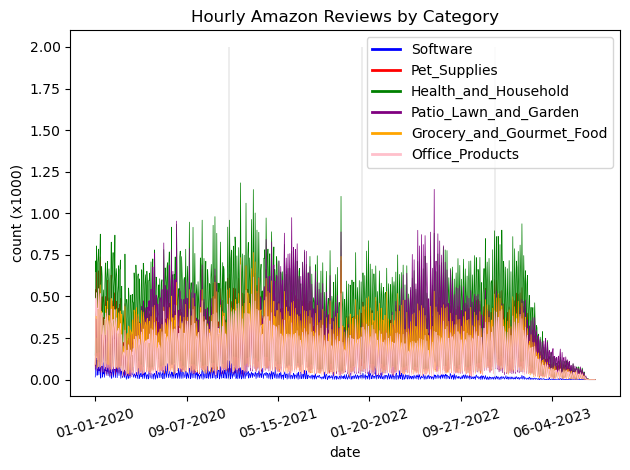

In [7]:
scale = 1000
scale_ind = 30
years_cut = years[::scale_ind]
time_arr_cut = time_arr[::scale_ind]

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Hourly Amazon Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0],::scale_ind]/scale, c='blue', lw=0.5)
ln2, = ax.plot(timeseries[rand_ind[1],::scale_ind]/scale, c='red', lw=0.5)
ln3, = ax.plot(timeseries[rand_ind[2],::scale_ind]/scale, c='green', lw=0.5)
ln4, = ax.plot(timeseries[rand_ind[3],::scale_ind]/scale, c='purple', lw=0.5)
ln5, = ax.plot(timeseries[rand_ind[4],::scale_ind]/scale, c='orange', lw=0.5)
ln6, = ax.plot(timeseries[rand_ind[5],::scale_ind]/scale, c='pink', lw=0.5)
ax.vlines(np.where(years_cut[:-1] != years_cut[1:])[0],0,math.ceil(ax.get_ylim()[1]),colors='black', linewidth=0.1)

leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return time_arr_cut[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()

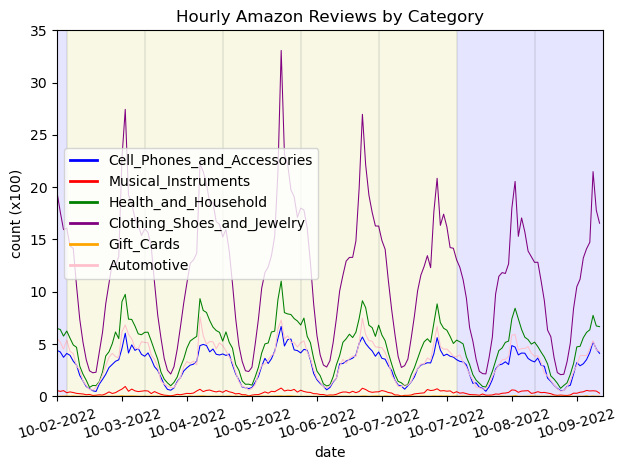

In [13]:
scale = 100

week_interval = 60*60*24*7
start_date = np.random.randint(0,timeseries_len-week_interval//time_interval)

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Hourly Amazon Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0], start_date:start_date+week_interval//time_interval]/scale, c='blue', lw=0.75)
ln2, = ax.plot(timeseries[rand_ind[1], start_date:start_date+week_interval//time_interval]/scale, c='red', lw=0.75)
ln3, = ax.plot(timeseries[rand_ind[2], start_date:start_date+week_interval//time_interval]/scale, c='green', lw=0.75)
ln4, = ax.plot(timeseries[rand_ind[3], start_date:start_date+week_interval//time_interval]/scale, c='purple', lw=0.75)
ln5, = ax.plot(timeseries[rand_ind[4], start_date:start_date+week_interval//time_interval]/scale, c='orange', lw=0.75)
ln6, = ax.plot(timeseries[rand_ind[5], start_date:start_date+week_interval//time_interval]/scale, c='pink', lw=0.75)


cut_time_arr = time_arr[start_date:start_date+week_interval//time_interval]
cut_years = years[start_date:start_date+week_interval//time_interval]
cut_months = months[start_date:start_date+week_interval//time_interval]
# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return cut_time_arr[int(x)]
    except IndexError:
        return ''
    
cut_weekdays = weekdays_timestamps[start_date:start_date+week_interval//time_interval]
Z = np.repeat(cut_weekdays.reshape(1,len(cut_weekdays)),int(ax.get_ylim()[1]+1),axis=0).reshape(int(ax.get_ylim()[1]+1),len(cut_weekdays)) 
cvals = [0,1,2,3,4,5,6]
colors = ['y','y','y','y','y','b','b']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
c = ax.pcolor(Z, alpha=0.1, edgecolor=None, snap=True, cmap=cmap) 
ax.vlines(np.where(cut_weekdays[:-1] != cut_weekdays[1:])[0]+1,0,ax.get_ylim()[1], colors='black', linewidth=0.1)
leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()